# EMG Signal for gesture recognition

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd
Input_path = r"D:\EMG Classifiers\EMG-data.csv"
df = pd.read_csv(Input_path)
print(df.head())
print(df.shape)

   time  channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
0     1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
1     5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
2     6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
3     7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
4     8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   

   channel8  class  label  
0  -0.00001      0      1  
1  -0.00001      0      1  
2   0.00001      0      1  
3   0.00001      0      1  
4   0.00001      0      1  
(4237907, 11)


In [3]:
print("class :", df["class"].unique())
print()
#print("Labels :",df["label"].unique()) # 36 people hand gesture data
#print()
print("Value Count :\n",df["class"].value_counts())

class : [0 1 2 3 4 5 6 7]

Value Count :
 class
0    2725157
6     253009
5     251733
4     251570
1     250055
3     249494
2     243193
7      13696
Name: count, dtype: int64


In [4]:
features = df.drop(columns=["label","class","time"])
display(features.head())
#print(features.shape())

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001
1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001
2,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001
3,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001
4,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001


In [5]:
Class = df["class"]
print(Class.unique())
#print(Class.shape())

[0 1 2 3 4 5 6 7]


In [6]:
print(type(Class))
print(type(features))

Class = Class.values
features = features.values

print(type(Class))
print(type(features))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
# split in training 70%, validation 10 %,  test 20% test 
from sklearn.model_selection import train_test_split
# 80 and 20
x_train, x_test, y_train, y_test = train_test_split(features, Class, test_size=0.2, random_state=1)

In [8]:
# Normalizing data
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train -= mean
x_train /= std

x_test -= mean
x_test /= std

In [9]:
# one hot encoding Labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [10]:
# creating a function for plotting

def plot(loss,val_loss,acc,val_acc):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('acc')
    plt.legend()
    plt.show()

In [11]:
#################################

In [12]:
from tensorflow.keras import layers, Sequential, optimizers, Input, Model

input_tensor = Input(shape=(8,))
x = layers.Dense(1024, activation='relu')(input_tensor)
y = layers.Dense(512, activation='relu')(x)
z = layers.Dense(256, activation='relu')(y)
z = layers.Dense(128, activation='relu')(z)
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
z = layers.Dense(128, activation='relu')(y) # acyclic graghs of layers
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
output_tensor = layers.Dense(8, activation='softmax')(z)

model = Model(input_tensor, output_tensor)

#SGD #RMSprop #Adam #Adadelta #Adagrad ##Adamax ###Nadam #Ftrl
opt = optimizers.Nadam(lr=1e-3)
model.compile(optimizer = opt, 
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

#model.summary()

In [13]:
# saving model, creating log for tensorboard and applying few callbacks

def callbacks(Log,Dir):
  import tensorflow as tf
  import os

  Filepath = Path
  logdir = os.path.join(Filepath, Dir)
  
  callbacks_list = [tf.keras.callbacks.TensorBoard(
                    log_dir=logdir,                 #  tensorboard log path      
                    histogram_freq=1,),
                    tf.keras.callbacks.EarlyStopping(   # stop if not improving
                    monitor='val_accuracy',patience=2,),           # monitor validation accuracy
                    #tf.keras.callbacks.ReduceLROnPlateau(
                    #monitor='val_loss',factor=0.1,         # lr ko .1 se multiply kerdo (kam kerdo)
                    #patience=10,),                # reduce the lrate if val loss stop improving
                    tf.keras.callbacks.ModelCheckpoint(
                    filepath= Filepath,             # save model path
                    monitor='val_loss',             # only save best weights
                    save_best_only=True,)]
  return callbacks_list

Epoch 1/200
5298/5298 [==============================] - ETA: 0s - loss: 0.9110 - accuracy: 0.6452INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 81s 15ms/step - loss: 0.9110 - accuracy: 0.6452 - val_loss: 0.8888 - val_accuracy: 0.6477
Epoch 2/200
5298/5298 [==============================] - ETA: 0s - loss: 0.8774 - accuracy: 0.6507INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 77s 15ms/step - loss: 0.8774 - accuracy: 0.6507 - val_loss: 0.8676 - val_accuracy: 0.6548
Epoch 3/200
5296/5298 [============================>.] - ETA: 0s - loss: 0.8535 - accuracy: 0.6585INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 77s 15ms/step - loss: 0.8536 - accuracy: 0.6585 - val_loss: 0.8403 - val_accuracy: 0.6629
Epoch 4/200
5295/5298 [============================>.] - ETA: 0s - loss: 0.8255 - accuracy: 0.6696INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 79s 15ms/step - loss: 0.8255 - accuracy: 0.6696 - val_loss: 0.8178 - val_accuracy: 0.6735
Epoch 5/200
5296/5298 [============================>.] - ETA: 0s - loss: 0.7950 - accuracy: 0.6828INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 77s 15ms/step - loss: 0.7950 - accuracy: 0.6828 - val_loss: 0.7891 - val_accuracy: 0.6859
Epoch 6/200
5297/5298 [============================>.] - ETA: 0s - loss: 0.7643 - accuracy: 0.6966INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 78s 15ms/step - loss: 0.7643 - accuracy: 0.6966 - val_loss: 0.7634 - val_accuracy: 0.6980
Epoch 7/200
5297/5298 [============================>.] - ETA: 0s - loss: 0.7352 - accuracy: 0.7105INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 78s 15ms/step - loss: 0.7352 - accuracy: 0.7105 - val_loss: 0.7351 - val_accuracy: 0.7126
Epoch 8/200
5298/5298 [==============================] - ETA: 0s - loss: 0.7080 - accuracy: 0.7235INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 77s 15ms/step - loss: 0.7080 - accuracy: 0.7235 - val_loss: 0.7206 - val_accuracy: 0.7201
Epoch 9/200
5297/5298 [============================>.] - ETA: 0s - loss: 0.6829 - accuracy: 0.7353INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 76s 14ms/step - loss: 0.6829 - accuracy: 0.7353 - val_loss: 0.6925 - val_accuracy: 0.7345
Epoch 10/200
5296/5298 [============================>.] - ETA: 0s - loss: 0.6600 - accuracy: 0.7461INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 76s 14ms/step - loss: 0.6600 - accuracy: 0.7461 - val_loss: 0.6745 - val_accuracy: 0.7433
Epoch 11/200
5298/5298 [==============================] - ETA: 0s - loss: 0.6392 - accuracy: 0.7560INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 76s 14ms/step - loss: 0.6392 - accuracy: 0.7560 - val_loss: 0.6564 - val_accuracy: 0.7518
Epoch 12/200
5295/5298 [============================>.] - ETA: 0s - loss: 0.6198 - accuracy: 0.7651INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 76s 14ms/step - loss: 0.6198 - accuracy: 0.7651 - val_loss: 0.6396 - val_accuracy: 0.7607
Epoch 13/200
5297/5298 [============================>.] - ETA: 0s - loss: 0.6025 - accuracy: 0.7731INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 80s 15ms/step - loss: 0.6025 - accuracy: 0.7731 - val_loss: 0.6230 - val_accuracy: 0.7684
Epoch 14/200
5297/5298 [============================>.] - ETA: 0s - loss: 0.5862 - accuracy: 0.7804INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 81s 15ms/step - loss: 0.5862 - accuracy: 0.7804 - val_loss: 0.6090 - val_accuracy: 0.7744
Epoch 15/200
5295/5298 [============================>.] - ETA: 0s - loss: 0.5709 - accuracy: 0.7872INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 79s 15ms/step - loss: 0.5709 - accuracy: 0.7872 - val_loss: 0.5991 - val_accuracy: 0.7799
Epoch 16/200
5294/5298 [============================>.] - ETA: 0s - loss: 0.5571 - accuracy: 0.7937INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 78s 15ms/step - loss: 0.5571 - accuracy: 0.7937 - val_loss: 0.5888 - val_accuracy: 0.7864
Epoch 17/200
5296/5298 [============================>.] - ETA: 0s - loss: 0.5435 - accuracy: 0.7998INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 77s 15ms/step - loss: 0.5435 - accuracy: 0.7998 - val_loss: 0.5792 - val_accuracy: 0.7898
Epoch 18/200
5296/5298 [============================>.] - ETA: 0s - loss: 0.5317 - accuracy: 0.8047INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 77s 14ms/step - loss: 0.5317 - accuracy: 0.8047 - val_loss: 0.5604 - val_accuracy: 0.7996
Epoch 19/200
5298/5298 [==============================] - ETA: 0s - loss: 0.5201 - accuracy: 0.8099INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 78s 15ms/step - loss: 0.5201 - accuracy: 0.8099 - val_loss: 0.5550 - val_accuracy: 0.8007
Epoch 20/200
5296/5298 [============================>.] - ETA: 0s - loss: 0.5093 - accuracy: 0.8146INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 79s 15ms/step - loss: 0.5093 - accuracy: 0.8146 - val_loss: 0.5483 - val_accuracy: 0.8045
Epoch 21/200
5296/5298 [============================>.] - ETA: 0s - loss: 0.4992 - accuracy: 0.8187INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 78s 15ms/step - loss: 0.4992 - accuracy: 0.8187 - val_loss: 0.5466 - val_accuracy: 0.8064
Epoch 22/200
5295/5298 [============================>.] - ETA: 0s - loss: 0.4895 - accuracy: 0.8230INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 77s 15ms/step - loss: 0.4895 - accuracy: 0.8230 - val_loss: 0.5264 - val_accuracy: 0.8148
Epoch 23/200
5298/5298 [==============================] - ETA: 0s - loss: 0.4806 - accuracy: 0.8269INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 77s 15ms/step - loss: 0.4806 - accuracy: 0.8269 - val_loss: 0.5204 - val_accuracy: 0.8180
Epoch 24/200
5295/5298 [============================>.] - ETA: 0s - loss: 0.4718 - accuracy: 0.8305INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 76s 14ms/step - loss: 0.4718 - accuracy: 0.8305 - val_loss: 0.5073 - val_accuracy: 0.8238
Epoch 25/200
5297/5298 [============================>.] - ETA: 0s - loss: 0.4637 - accuracy: 0.8339INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 77s 15ms/step - loss: 0.4637 - accuracy: 0.8339 - val_loss: 0.5055 - val_accuracy: 0.8251
Epoch 26/200
5296/5298 [============================>.] - ETA: 0s - loss: 0.4551 - accuracy: 0.8374INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 77s 15ms/step - loss: 0.4551 - accuracy: 0.8374 - val_loss: 0.5052 - val_accuracy: 0.8256
Epoch 27/200
5296/5298 [============================>.] - ETA: 0s - loss: 0.4480 - accuracy: 0.8403INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 83s 16ms/step - loss: 0.4480 - accuracy: 0.8403 - val_loss: 0.4943 - val_accuracy: 0.8308
Epoch 28/200
5297/5298 [============================>.] - ETA: 0s - loss: 0.4409 - accuracy: 0.8435INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 78s 15ms/step - loss: 0.4409 - accuracy: 0.8435 - val_loss: 0.4939 - val_accuracy: 0.8298
Epoch 29/200
5297/5298 [============================>.] - ETA: 0s - loss: 0.4341 - accuracy: 0.8462INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 78s 15ms/step - loss: 0.4341 - accuracy: 0.8462 - val_loss: 0.4782 - val_accuracy: 0.8368
Epoch 30/200
5298/5298 [==============================] - 77s 14ms/step - loss: 0.4271 - accuracy: 0.8492 - val_loss: 0.4858 - val_accuracy: 0.8349
Epoch 31/200
5296/5298 [============================>.] - ETA: 0s - loss: 0.4212 - accuracy: 0.8516INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 77s 15ms/step - loss: 0.4212 - accuracy: 0.8516 - val_loss: 0.4744 - val_accuracy: 0.8397
Epoch 32/200
5295/5298 [============================>.] - ETA: 0s - loss: 0.4148 - accuracy: 0.8543INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 77s 15ms/step - loss: 0.4148 - accuracy: 0.8543 - val_loss: 0.4669 - val_accuracy: 0.8427
Epoch 33/200
5297/5298 [============================>.] - ETA: 0s - loss: 0.4091 - accuracy: 0.8566INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 76s 14ms/step - loss: 0.4091 - accuracy: 0.8566 - val_loss: 0.4586 - val_accuracy: 0.8472
Epoch 34/200
5295/5298 [============================>.] - ETA: 0s - loss: 0.4038 - accuracy: 0.8586INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 77s 15ms/step - loss: 0.4038 - accuracy: 0.8586 - val_loss: 0.4546 - val_accuracy: 0.8490
Epoch 35/200
5298/5298 [==============================] - 81s 15ms/step - loss: 0.3979 - accuracy: 0.8610 - val_loss: 0.4556 - val_accuracy: 0.8489
Epoch 36/200
5298/5298 [==============================] - ETA: 0s - loss: 0.3926 - accuracy: 0.8632INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 80s 15ms/step - loss: 0.3926 - accuracy: 0.8632 - val_loss: 0.4440 - val_accuracy: 0.8538
Epoch 37/200
5298/5298 [==============================] - 78s 15ms/step - loss: 0.3877 - accuracy: 0.8651 - val_loss: 0.4491 - val_accuracy: 0.8514
Epoch 38/200
5296/5298 [============================>.] - ETA: 0s - loss: 0.3829 - accuracy: 0.8670INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 78s 15ms/step - loss: 0.3829 - accuracy: 0.8670 - val_loss: 0.4373 - val_accuracy: 0.8567
Epoch 39/200
5295/5298 [============================>.] - ETA: 0s - loss: 0.3777 - accuracy: 0.8691INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 78s 15ms/step - loss: 0.3778 - accuracy: 0.8691 - val_loss: 0.4364 - val_accuracy: 0.8586
Epoch 40/200
5298/5298 [==============================] - ETA: 0s - loss: 0.3738 - accuracy: 0.8709INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 78s 15ms/step - loss: 0.3738 - accuracy: 0.8709 - val_loss: 0.4318 - val_accuracy: 0.8602
Epoch 41/200
5297/5298 [============================>.] - ETA: 0s - loss: 0.3699 - accuracy: 0.8725INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 78s 15ms/step - loss: 0.3699 - accuracy: 0.8725 - val_loss: 0.4248 - val_accuracy: 0.8629
Epoch 42/200
5298/5298 [==============================] - 77s 15ms/step - loss: 0.3655 - accuracy: 0.8740 - val_loss: 0.4268 - val_accuracy: 0.8627
Epoch 43/200
5297/5298 [============================>.] - ETA: 0s - loss: 0.3608 - accuracy: 0.8757INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 80s 15ms/step - loss: 0.3608 - accuracy: 0.8757 - val_loss: 0.4197 - val_accuracy: 0.8656
Epoch 44/200
5297/5298 [============================>.] - ETA: 0s - loss: 0.3567 - accuracy: 0.8774INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 78s 15ms/step - loss: 0.3567 - accuracy: 0.8774 - val_loss: 0.4168 - val_accuracy: 0.8667
Epoch 45/200
5295/5298 [============================>.] - ETA: 0s - loss: 0.3536 - accuracy: 0.8787INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 83s 16ms/step - loss: 0.3536 - accuracy: 0.8787 - val_loss: 0.4143 - val_accuracy: 0.8686
Epoch 46/200
5298/5298 [==============================] - ETA: 0s - loss: 0.3500 - accuracy: 0.8803INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 82s 15ms/step - loss: 0.3500 - accuracy: 0.8803 - val_loss: 0.4137 - val_accuracy: 0.8689
Epoch 47/200
5295/5298 [============================>.] - ETA: 0s - loss: 0.3458 - accuracy: 0.8818INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 78s 15ms/step - loss: 0.3458 - accuracy: 0.8818 - val_loss: 0.4106 - val_accuracy: 0.8716
Epoch 48/200
5295/5298 [============================>.] - ETA: 0s - loss: 0.3428 - accuracy: 0.8832INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 77s 15ms/step - loss: 0.3428 - accuracy: 0.8832 - val_loss: 0.4077 - val_accuracy: 0.8710
Epoch 49/200
5297/5298 [============================>.] - ETA: 0s - loss: 0.3391 - accuracy: 0.8846INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5298/5298 [==============================] - 78s 15ms/step - loss: 0.3391 - accuracy: 0.8846 - val_loss: 0.4027 - val_accuracy: 0.8752
Epoch 50/200
5298/5298 [==============================] - 78s 15ms/step - loss: 0.3360 - accuracy: 0.8858 - val_loss: 0.4090 - val_accuracy: 0.8721
Epoch 51/200
5298/5298 [==============================] - 81s 15ms/step - loss: 0.3328 - accuracy: 0.8869 - val_loss: 0.4057 - val_accuracy: 0.8737


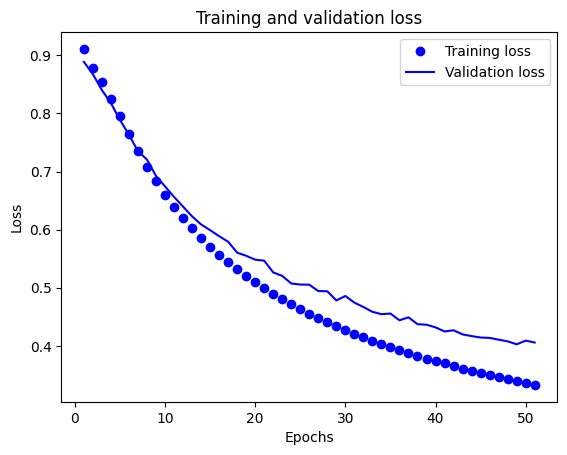

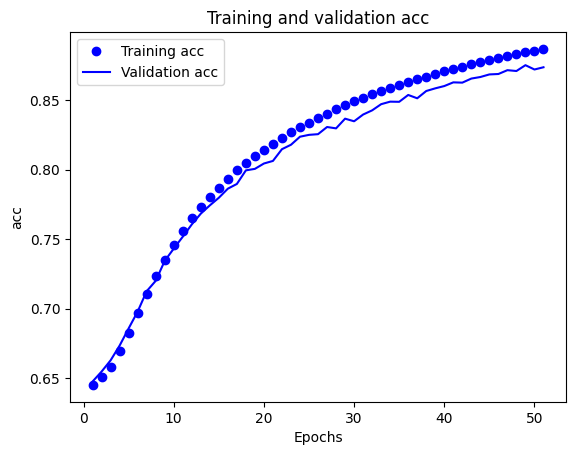

In [14]:
Path = "model1"
Dir = "my_log_dir"   
Call_B_Fun = callbacks(Path,Dir)

batch_size = 512            
epochs = 200                

history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs = epochs,
                    validation_split = 0.2, callbacks=Call_B_Fun)

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plot(loss,val_loss,acc,val_acc)

In [15]:
# saving our model
model.save('model1/emg_1.h5')

c:\Users\MrSus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
#################

In [17]:
# loading saved model
from tensorflow.keras.models import load_model
emg = 'model1/emg_1.h5'
emg_model = load_model(emg)
#emg_model.summary()

In [18]:
# Removing layers

new_model = Model(emg_model.inputs, emg_model.layers[-2].output) # removing layers
new_model.summary()
# removed all layers except conv

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 1024)              9216      
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
Total params: 610016 (2.33 MB)
Trainable params: 610016 (2.

In [19]:
from tensorflow.keras import layers, optimizers, Input, Model

input_tensor = Input(shape=(8,))
x = new_model(input_tensor)       # this is our old model
#z = layers.Dense(256, activation='relu')(x)
output_tensor = layers.Dense(8, activation='softmax')(x)

model = Model(input_tensor, output_tensor)

#SGD #RMSprop #Adam #Adadelta #Adagrad ##Adamax ###Nadam #Ftrl
opt = optimizers.Nadam(lr=1e-3)
model.compile(optimizer = opt, 
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 8)]               0         
                                                                 
 model_1 (Functional)        (None, 32)                610016    
                                                                 
 dense_10 (Dense)            (None, 8)                 264       
                                                                 
Total params: 610280 (2.33 MB)
Trainable params: 610280 (2.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
def callbacks(Log,Dir):
  import tensorflow as tf
  import os

  Filepath = Path
  logdir = os.path.join(Filepath, Dir)
  
  callbacks_list = [tf.keras.callbacks.TensorBoard(
                    log_dir=logdir,                 #  tensorboard log path      
                    histogram_freq=1,),
                    tf.keras.callbacks.EarlyStopping(   # stop if not improving
                    monitor='val_loss',patience=2,),           # monitor validation loss
                    tf.keras.callbacks.ReduceLROnPlateau(
                    monitor='val_loss',factor=0.1,         # lr ko .1 se multiply kerdo (kam kerdo)
                    patience=10,),                # reduce the lrate if val loss stop improving
                    tf.keras.callbacks.ModelCheckpoint(
                    filepath= Filepath,             # save model path
                    monitor='val_loss',             # only save best weights
                    save_best_only=True,)]
  return callbacks_list

Epoch 1/200
5297/5298 [============================>.] - ETA: 0s - loss: 0.9380 - accuracy: 0.6659INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


5298/5298 [==============================] - 105s 19ms/step - loss: 0.9380 - accuracy: 0.6660 - val_loss: 0.5941 - val_accuracy: 0.7710 - lr: 0.0010
Epoch 2/200
5295/5298 [============================>.] - ETA: 0s - loss: 0.4340 - accuracy: 0.8403INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


5298/5298 [==============================] - 98s 19ms/step - loss: 0.4340 - accuracy: 0.8404 - val_loss: 0.4422 - val_accuracy: 0.8515 - lr: 0.0010
Epoch 3/200
5297/5298 [============================>.] - ETA: 0s - loss: 0.3658 - accuracy: 0.8719INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


5298/5298 [==============================] - 99s 19ms/step - loss: 0.3658 - accuracy: 0.8719 - val_loss: 0.4220 - val_accuracy: 0.8631 - lr: 0.0010
Epoch 4/200
5297/5298 [============================>.] - ETA: 0s - loss: 0.3457 - accuracy: 0.8808INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


5298/5298 [==============================] - 98s 19ms/step - loss: 0.3457 - accuracy: 0.8808 - val_loss: 0.4154 - val_accuracy: 0.8692 - lr: 0.0010
Epoch 5/200
5295/5298 [============================>.] - ETA: 0s - loss: 0.3337 - accuracy: 0.8861INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


5298/5298 [==============================] - 95s 18ms/step - loss: 0.3337 - accuracy: 0.8861 - val_loss: 0.4037 - val_accuracy: 0.8730 - lr: 0.0010
Epoch 6/200
5296/5298 [============================>.] - ETA: 0s - loss: 0.3266 - accuracy: 0.8888INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


5298/5298 [==============================] - 93s 18ms/step - loss: 0.3266 - accuracy: 0.8888 - val_loss: 0.3932 - val_accuracy: 0.8790 - lr: 0.0010
Epoch 7/200
5297/5298 [============================>.] - ETA: 0s - loss: 0.3227 - accuracy: 0.8907INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


5298/5298 [==============================] - 100s 19ms/step - loss: 0.3227 - accuracy: 0.8907 - val_loss: 0.3923 - val_accuracy: 0.8792 - lr: 0.0010
Epoch 8/200
5297/5298 [============================>.] - ETA: 0s - loss: 0.3191 - accuracy: 0.8922INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


5298/5298 [==============================] - 94s 18ms/step - loss: 0.3191 - accuracy: 0.8922 - val_loss: 0.3898 - val_accuracy: 0.8819 - lr: 0.0010
Epoch 9/200
5298/5298 [==============================] - 94s 18ms/step - loss: 0.3155 - accuracy: 0.8934 - val_loss: 0.3942 - val_accuracy: 0.8797 - lr: 0.0010
Epoch 10/200
5296/5298 [============================>.] - ETA: 0s - loss: 0.3124 - accuracy: 0.8947INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


5298/5298 [==============================] - 95s 18ms/step - loss: 0.3124 - accuracy: 0.8947 - val_loss: 0.3822 - val_accuracy: 0.8849 - lr: 0.0010
Epoch 11/200
5298/5298 [==============================] - 92s 17ms/step - loss: 0.3095 - accuracy: 0.8960 - val_loss: 0.3882 - val_accuracy: 0.8818 - lr: 0.0010
Epoch 12/200
5297/5298 [============================>.] - ETA: 0s - loss: 0.3063 - accuracy: 0.8971INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


5298/5298 [==============================] - 95s 18ms/step - loss: 0.3063 - accuracy: 0.8971 - val_loss: 0.3794 - val_accuracy: 0.8857 - lr: 0.0010
Epoch 13/200
5298/5298 [==============================] - 92s 17ms/step - loss: 0.3037 - accuracy: 0.8982 - val_loss: 0.3827 - val_accuracy: 0.8850 - lr: 0.0010
Epoch 14/200
5297/5298 [============================>.] - ETA: 0s - loss: 0.3013 - accuracy: 0.8992INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


5298/5298 [==============================] - 92s 17ms/step - loss: 0.3013 - accuracy: 0.8992 - val_loss: 0.3788 - val_accuracy: 0.8873 - lr: 0.0010
Epoch 15/200
5298/5298 [==============================] - ETA: 0s - loss: 0.2984 - accuracy: 0.9003INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


5298/5298 [==============================] - 93s 18ms/step - loss: 0.2984 - accuracy: 0.9003 - val_loss: 0.3734 - val_accuracy: 0.8884 - lr: 0.0010
Epoch 16/200
5298/5298 [==============================] - 92s 17ms/step - loss: 0.2961 - accuracy: 0.9012 - val_loss: 0.3840 - val_accuracy: 0.8844 - lr: 0.0010
Epoch 17/200
5297/5298 [============================>.] - ETA: 0s - loss: 0.2936 - accuracy: 0.9021INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


5298/5298 [==============================] - 95s 18ms/step - loss: 0.2936 - accuracy: 0.9021 - val_loss: 0.3688 - val_accuracy: 0.8912 - lr: 0.0010
Epoch 18/200
5298/5298 [==============================] - 105s 20ms/step - loss: 0.2907 - accuracy: 0.9031 - val_loss: 0.3758 - val_accuracy: 0.8895 - lr: 0.0010
Epoch 19/200
5298/5298 [==============================] - 105s 20ms/step - loss: 0.2887 - accuracy: 0.9041 - val_loss: 0.3740 - val_accuracy: 0.8896 - lr: 0.0010


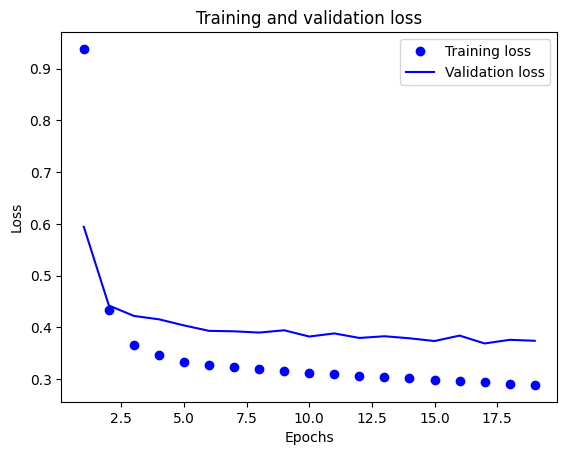

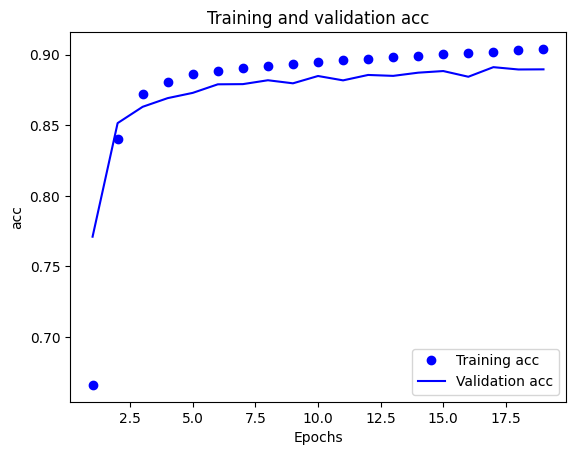

In [21]:
Path = "model2"
Dir = "my_log_dir"   
Call_B_Fun = callbacks(Path,Dir)

batch_size = 512            
epochs = 200                

history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs = epochs,
                    validation_split = 0.2, callbacks=Call_B_Fun)

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plot(loss,val_loss,acc,val_acc)

In [22]:
# saving our model
model.save('model2/emg_2.h5')

c:\Users\MrSus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
###################

In [24]:
# loading saved model
from tensorflow.keras.models import load_model
emg = 'model2/emg_2.h5'
emg_model = load_model(emg)
#emg_model.summary()

In [25]:
from tensorflow.keras import layers, Sequential, optimizers, Input, Model

input_tensor = Input(shape=(8,))
x = layers.Dense(1024, activation='relu')(input_tensor)
y = layers.Dense(512, activation='relu')(x)
z = layers.Dense(256, activation='relu')(y)
z = layers.Dense(128, activation='relu')(z)
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
z = layers.Dense(128, activation='relu')(y) # acyclic graghs of layers
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
output_tensor = layers.Dense(8, activation='softmax')(z)

model = Model(input_tensor, output_tensor)

opt = optimizers.Nadam(lr=1e-3)
model.compile(optimizer = opt, 
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.set_weights(emg_model.get_weights())   # using pretrained model weights

#model.summary()

In [27]:
callbacks_list = [tf.keras.callbacks.EarlyStopping(   # stop if not improving
                monitor='accuracy',patience=5,),           # monitor validation accuracy
                tf.keras.callbacks.ModelCheckpoint(
                filepath='my_model.h5',
                monitor='val_loss',                   # only save best weights
                save_best_only=True,)]                # when vall loss is improved

batch_size = 512           
epochs = 15                

history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs = epochs,
                    validation_split = 0.2,
                    callbacks=callbacks_list)

Epoch 1/15
5298/5298 [==============================] - 85s 16ms/step - loss: 0.2696 - accuracy: 0.9114 - val_loss: 0.3570 - val_accuracy: 0.8990
Epoch 2/15
5298/5298 [==============================] - 83s 16ms/step - loss: 0.2680 - accuracy: 0.9121 - val_loss: 0.3543 - val_accuracy: 0.9001
Epoch 3/15
5298/5298 [==============================] - 84s 16ms/step - loss: 0.2658 - accuracy: 0.9129 - val_loss: 0.3571 - val_accuracy: 0.8993
Epoch 4/15
5298/5298 [==============================] - 84s 16ms/step - loss: 0.2647 - accuracy: 0.9135 - val_loss: 0.3505 - val_accuracy: 0.9009
Epoch 5/15
5298/5298 [==============================] - 86s 16ms/step - loss: 0.2627 - accuracy: 0.9142 - val_loss: 0.3602 - val_accuracy: 0.8990
Epoch 6/15
5298/5298 [==============================] - 85s 16ms/step - loss: 0.2614 - accuracy: 0.9146 - val_loss: 0.3476 - val_accuracy: 0.9043
Epoch 7/15
5298/5298 [==============================] - 84s 16ms/step - loss: 0.2599 - accuracy: 0.9150 - val_loss: 0.3491 -

In [28]:
model.save('emg_3.h5')

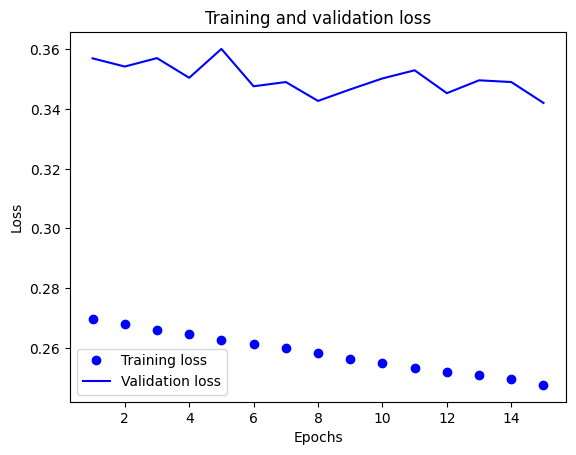

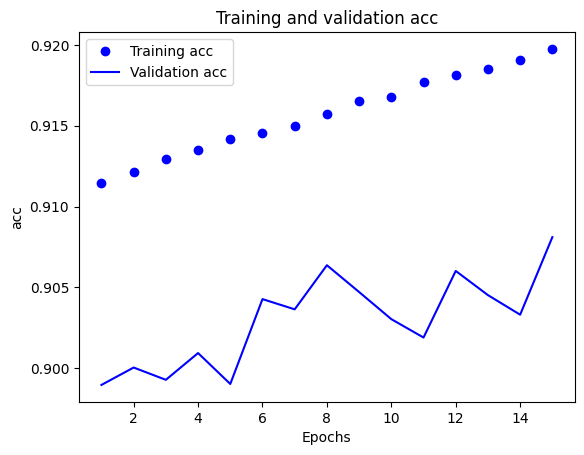

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plot(loss,val_loss,acc,val_acc)

In [ ]:
evaluation = model.evaluate(x_test,  y_test,batch_size=batch_size, verbose=2)
print()
print("Test loss :",evaluation[0]*100,"%")
print("Test accuracy :",evaluation[1]*100,"%")

### Prediction

In [31]:
predict = 105
a = np.argmax(model.predict(x_test)[predict])
print("Predicted Class: ",a)
print("Actual Class: ",np.argmax(y_test[predict]))

26487/26487 [==============================] - 45s 2ms/step
Predicted Class:  7
Actual Class:  7


: 